In [3]:
import json
import string
import matplotlib.pyplot as plt 
import json_lines

with open('result.jl', 'rb') as f:
    entities = [x for x in json_lines.reader(f)]
    stories = [x for x in entities if str(x['pageType']) == "story"]
    reviews = [x for x in entities if str(x['pageType']) == "review"]
    users = [x for x in entities if str(x['pageType']) == "user"]
    
    print(len(stories),len(reviews),len(users))
    #print(max(stories, key=lambda x: int(str(x['otherInfo']['favorites']).replace(',', ''))))
    #favorites = [int(str(x['otherInfo']['favorites'])) for x in stories]
    
    #print(max(stories, key=lambda x: int(str(x['otherInfo']['words']).replace(',', ''))))

280867 2219515 87388


In [2]:
sortedFavorites = sorted(favorites, reverse = True)
ranks = [x+1 for x in range(len(sortedFavorites))] 
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(sortedFavorites, color='blue', lw=2)
plt.show()

NameError: name 'favorites' is not defined

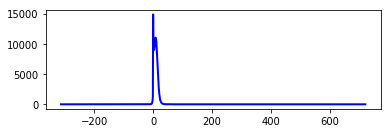

In [4]:
import operator
storyReviewDic = {}
for review in reviews:
    if(review['reviewOf'] not in storyReviewDic):
        storyReviewDic[review['reviewOf']] = []
    storyReviewDic[review['reviewOf']].append(review)

storySentimentScores = [sum([z['sentimentScore'] for z in y]) for x, y in storyReviewDic.items()]

buckets = {}

def updateBucket(x):
    buckets.setdefault(x, 0)
    buckets[x]+=1

[ updateBucket(int(x)) for x in storySentimentScores]

sortedBuckets = sorted(buckets.items(), key=operator.itemgetter(0))

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot([x for x,y in sortedBuckets], [y for x,y in sortedBuckets], color='blue', lw=2)

#print(sum(storySentimentScore)/ len(storySentimentScore))

In [10]:
sum(storySentimentScores)/len(storySentimentScores)

9.186804741777618

In [11]:
#print(buckets)

for i in range(-10, 30):
    print(i, buckets[i])


-10 6
-9 18
-8 39
-7 37
-6 58
-5 90
-4 166
-3 300
-2 656
-1 1235
0 14865
1 9591
2 9022
3 8977
4 9220
5 9545
6 10200
7 10597
8 11017
9 11012
10 10622
11 10302
12 9353
13 8486
14 7498
15 6449
16 5352
17 4277
18 3525
19 2781
20 2161
21 1652
22 1331
23 973
24 685
25 573
26 434
27 331
28 256
29 204


In [13]:
import numpy as np



idDict = {}
idCnt = 0

for x in users:
    if(x['name'] in idDict):
        continue;
    idDict[idCnt] = x['name']
    idCnt += 1

nameToIdDict = {v: k for k, v in idDict.items()}

userFavorites = {}
for user in users:
    userId = nameToIdDict[user['name']]
    userFavorites[userId] = []
    for favorite in user['favorites']:
        auther = favorite['favAuthor']
        if(auther in nameToIdDict):
            autherId = nameToIdDict[auther]
            if(autherId not in userFavorites[userId]):
                userFavorites[userId].append(autherId)
                
matrix = np.zeros([len(idDict), len(idDict)])

for userId, favorites in userFavorites.items():
    for favId in favorites:
        matrix[userId, favId] = 1
        
print(matrix)
    


MemoryError: 

C:\Users\12r45\Anaconda3\envs\cs470\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


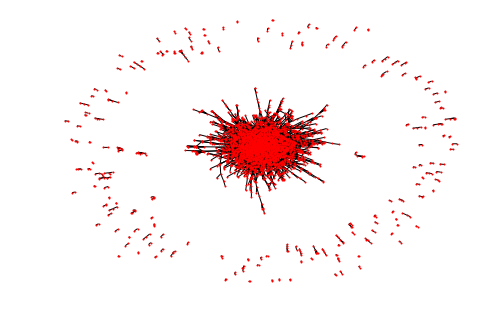

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=1)
    plt.show()
    
show_graph(matrix)
